#Analyse des Propergols
Dans ce code, nous avons regrouper les différents types de propergols que les moteurs utilisent. Pour mieux analyser nous avons créer un fichier CSV pour chaque propergol contenant 17 moteurs. Puis, nous allons tester la performance des moeteurs qui utilise les differents carburants. Nous ferons ceci en se focalisant sur leur masse, leur impulsion, et enfin le rapport entre ces deux pour tester l'efficacité des propergols 





# Importation des fichiers



---
Pour étudier les propergols, il nous faut importer et formatter leurs données, qui sont contenues dans les fichier CSV suivant:
- WhiteThunder.csv
- Blue_Streak.csv
- Imax.csv
- Classic.csv
- Skidmark.csv
- Smokey_Sam.csv
- Hybrid.csv

---

In [9]:
#on se relie avec le google drive pour ne pas avoir a toujours importer les fichiers directement
#toutes les données sont contenues dans un dossier nommé "Tropheé_NSI"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Transformation des fichier en listes de dictionnaires avec le module csv.

In [10]:
import csv 

with open("/content/drive/MyDrive/Trophee_NSI/WhiteThunder.csv", "r") as rfile:
  whitethunder = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Blue_Streak.csv", "r") as rfile:
  bluestreak = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Imax.csv", "r") as rfile:
  imax = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Classic.csv", "r") as rfile:
  classic = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Skidmark.csv", "r") as rfile:
  skidmark = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Smokey_Sam.csv", "r") as rfile:
  smoky_sam = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Hybrid.csv", "r") as rfile:
  hybrid = list(csv.DictReader(rfile, delimiter = ","))
  

Mise en evidence des cles...

In [11]:
cles = []
for val in whitethunder[0].keys():
  cles.append(val)

print(f"Les clés disponibles sont: {cles[:6]},")



Les clés disponibles sont: ['Manufacturer', 'Designation', 'Common Name', 'Total Weight', 'Prop. Weight', 'Total Impulse'],


# Les différents types de propergol

---
Le type de propergol est un aspect important de la performance mais aussi du coût environnemental de la fusée; certains sont tres toxiques pour l'environnement, et la plupart sont non-renouvelables. Cherchons le propergol le plus "efficace".

---

##Représentation

Tout d'abord, il nous faut transformer le poids, qui est sous forme de caracteres, en numéros, pour qu'on le puisse trier.

In [12]:
#Ce petit programme releve les codes ASCII des numéros, qu'on aura besoin pour notre fonction str_en_num

Lnum = [str(num) for num in range(10)]    #les codes ASCII ne marchent que pour des type string, d'ou la conversion en string du type des numéros
Lnum.append(".")    #on rajoute le code ASCII du point pour que notre fonction inclut aussi les nombres décimaux
ord_num = []

for num in Lnum:
  ord_num.append(ord(num)) 

def str_en_num(mot):
  """prend en argument une chaîne de caracteres et renvoie l'équivalent numérique, en ne gardant que les chiffres et le point pour les nombre décimaux"""
  mot2 = ''
  for carac in mot:
    if ord(carac) in ord_num:       #teste si le caractere est soit un numéro, soit un point (utilisé pour les chiffres décimaux), en utilisant le format ASCII
      mot2 += carac                 #si cela est le cas, alors nous fusionnons ce caractere a un mot ne contenant que les chiffres et symboles
  return float(mot2)                #on convertit ce mot en float a la fin du programme

print("Avec cette fonction, on réussit a transformer '5.60!1 g' en '", str_en_num("5.60!1 g"),"'.")

Avec cette fonction, on réussit a transformer '5.60!1 g' en ' 5.601 '.


Maintenant, nous allons créer les différents fonction que nous allons utliser pour notre analyse.

In [13]:

def tri_selection(dico, cle):
  """trie un dictionnaire en fonction d'une clé demandée, sachant que cette derniere contient des valeurs numériques"""
  for i in range(0,len(dico)):
    imin = i
    for j in range(i+1,len(dico)):                                              #on commence a i pour augmenter en efficacité (a chaque tour le programme fera moins de comparaisons)
      if str_en_num(dico[j][cle]) < str_en_num(dico[imin][cle]):
        imin = j                                                                #on retrouve le minimum
    dico.insert(i,dico[imin])                                                   #on l'insere a la position i, c'est a dire a la fin de la partie triée
    del dico[imin+1]                                                            #on enleve le double, qui se retoruve maintenant un indice plus vers la droie car nous avons rajouté un element au dico

  return dico

def moyenne(liste,p):#p = nombre de chiffres apres la virgule
  """cette fonction nous permet de trouver la moyenne d'une liste"""
  moy=0
  for i in range(len(liste)):
    moy += liste[i]
  return round(moy/len(liste),p)                                                    

def ratio(fdict): #fdict= nom du csv 
  """cette fonction nous permet de trouver le rapport entre deux variables """
  ratio=[]
  for fusee in fdict:
    ratio.append(round((str_en_num(fusee["Total Impulse"]))/(str_en_num(fusee["Prop. Weight"])),1))
  moy_ratio=moyenne(ratio,2)
  return moy_ratio


def dico_p_i(fdict):
  """cette fonction renvoie un dictionnaire contenant le nom du moteur, son poids et son impulsion, trié selon le poids en ordre croissant, et à partir d'une liste de dictionnaires de fusées"""
  fimpulse = [{"Common Name": fusee["Common Name"], "Total Impulse": fusee["Total Impulse"]} for fusee in fdict]
  fpoids = [{"Common Name": fusee["Common Name"], "Total Weight": fusee["Total Weight"]} for fusee in fdict]
  fpoids_sorted=tri_selection(fpoids,"Total Weight")
  p_i_moteur = [{"Common Name": fuseepoids["Common Name"], "Total Weight": fuseepoids["Total Weight"], "Total Impulse": fuseeimpulse["Total Impulse"]}
                        for fuseepoids in fpoids_sorted for fuseeimpulse in fimpulse if fuseepoids["Common Name"] == fuseeimpulse["Common Name"]]

  return p_i_moteur


 


Pour représenter la performance des fusés d'un certain type propergool, il nous faut relever leurs poids et leur impulsion.

In [14]:

poidsmoteur_w = [str_en_num(fusee["Total Weight"]) for fusee in dico_p_i(whitethunder)]
impulsionmoteur_w = [str_en_num(fusee["Total Impulse"]) for fusee in dico_p_i(whitethunder)]

poidsmoteur_b = [str_en_num(fusee["Total Weight"]) for fusee in dico_p_i(bluestreak)]
impulsionmoteur_b = [str_en_num(fusee["Total Impulse"]) for fusee in dico_p_i(bluestreak)]

poidsmoteur_imax = [str_en_num(fusee["Total Weight"]) for fusee in dico_p_i(imax)]
impulsionmoteur_imax = [str_en_num(fusee["Total Impulse"]) for fusee in dico_p_i(imax)]

poidsmoteur_c = [str_en_num(fusee["Total Weight"]) for fusee in dico_p_i(classic)]
impulsionmoteur_c = [str_en_num(fusee["Total Impulse"]) for fusee in dico_p_i(classic)]

poidsmoteur_s = [str_en_num(fusee["Total Weight"]) for fusee in dico_p_i(skidmark)]
impulsionmoteur_s = [str_en_num(fusee["Total Impulse"]) for fusee in dico_p_i(skidmark)]

poidsmoteur_sm = [str_en_num(fusee["Total Weight"]) for fusee in dico_p_i(smoky_sam)]
impulsionmoteur_sm = [str_en_num(fusee["Total Impulse"]) for fusee in dico_p_i(smoky_sam)]

poidsmoteur_h = [str_en_num(fusee["Total Weight"]) for fusee in dico_p_i(hybrid)]
impulsionmoteur_h = [str_en_num(fusee["Total Impulse"]) for fusee in dico_p_i(hybrid)]

Maintenant, nous pouvons representer le masse et l'impulsion des moteurs sans souci de valeurs pour chacun des propergol. 

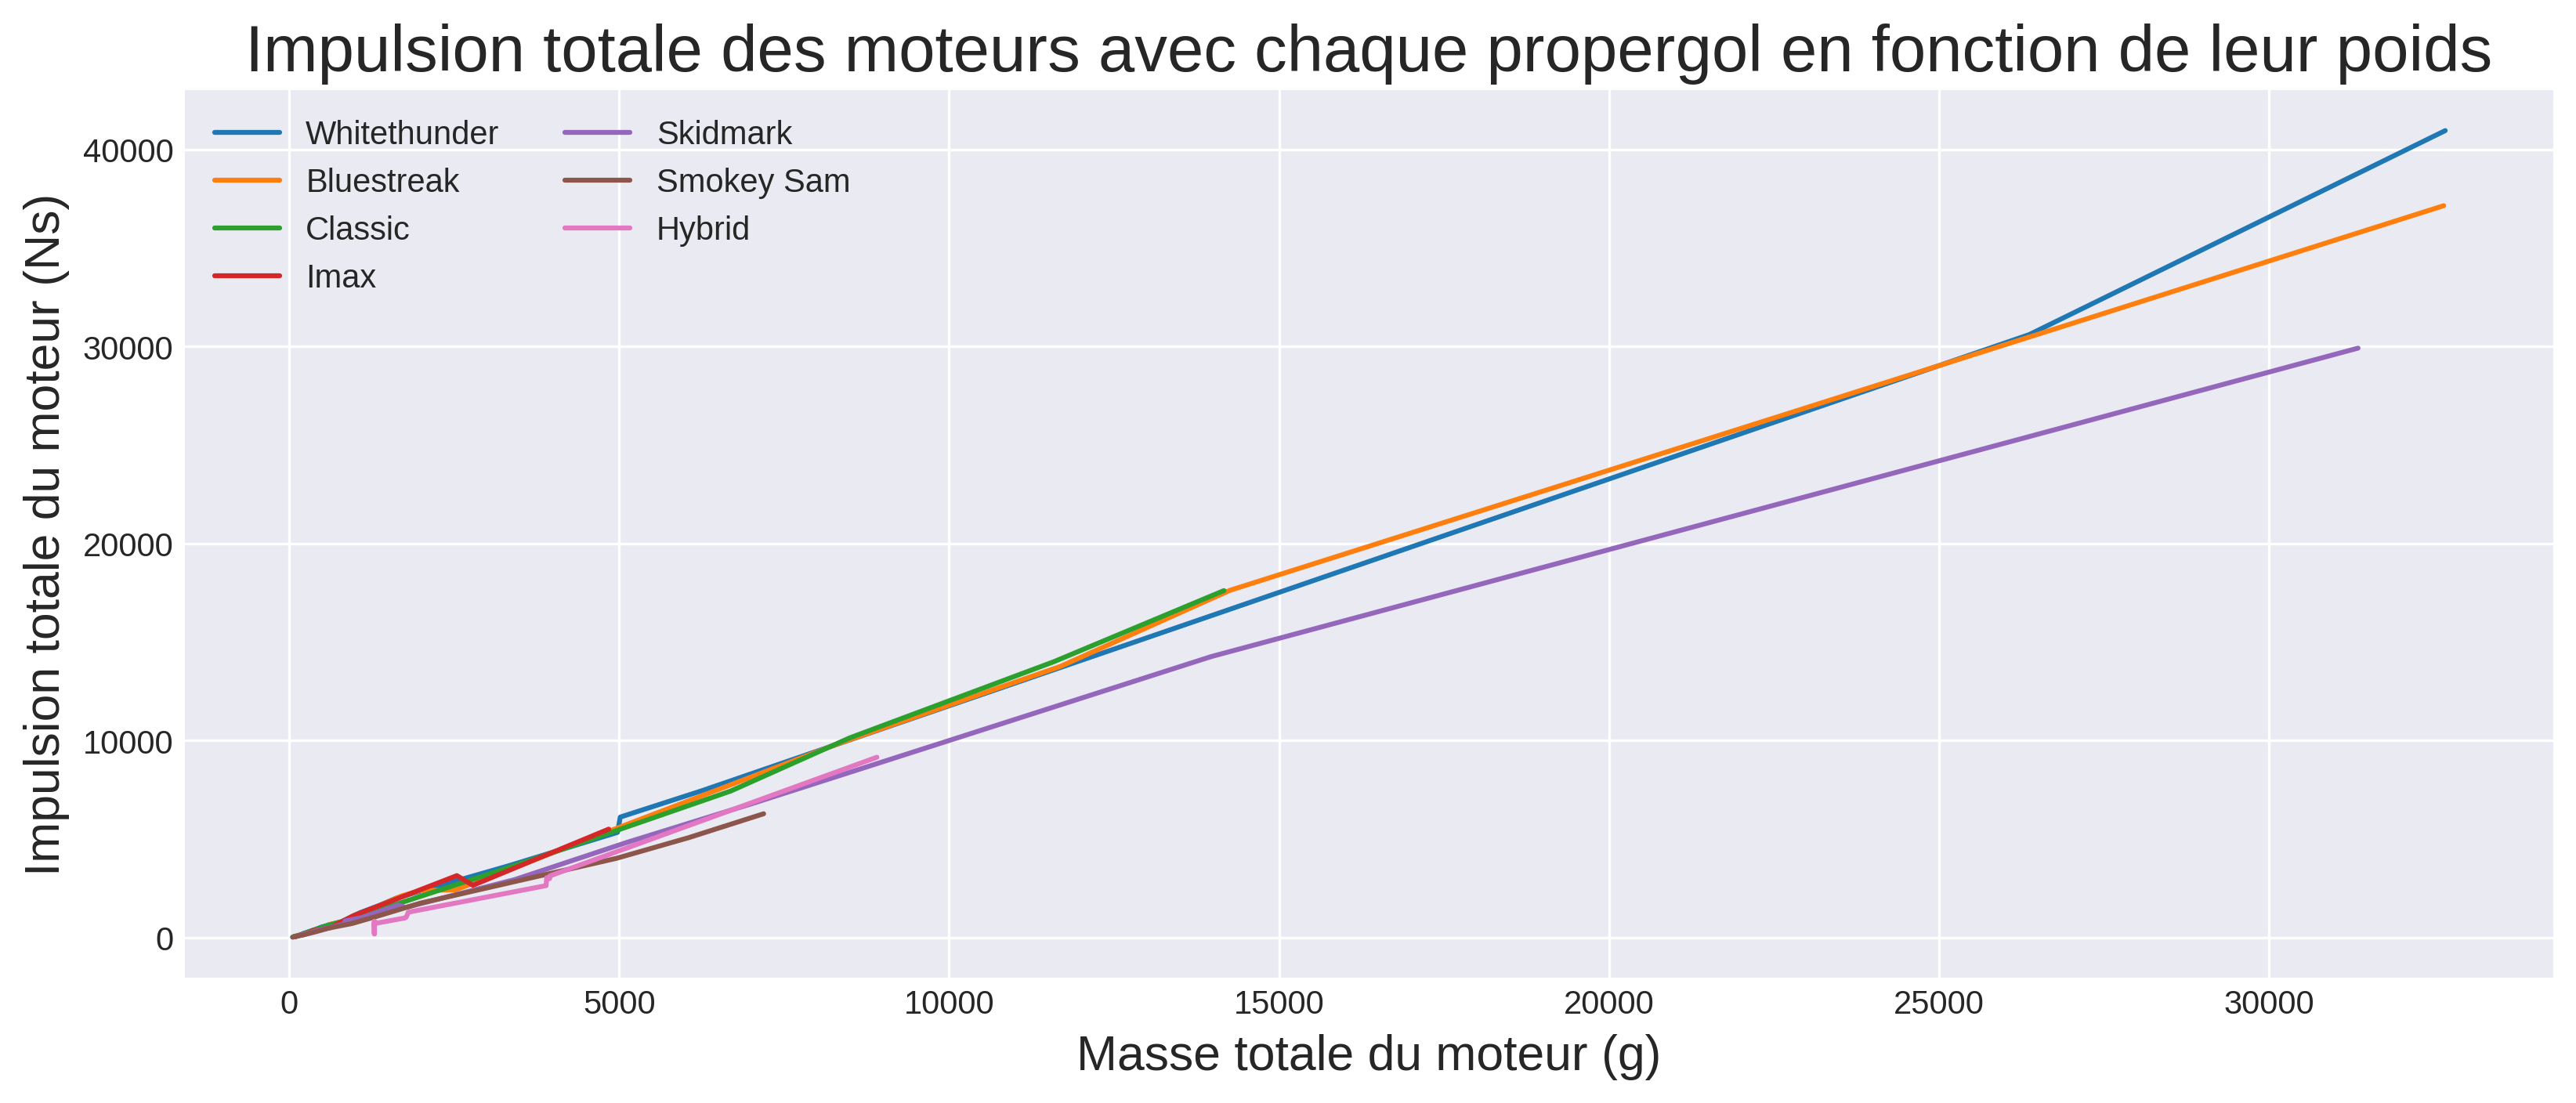

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5), dpi=300)

plt.plot(poidsmoteur_w,impulsionmoteur_w, label="Whitethunder")
plt.plot(poidsmoteur_b,impulsionmoteur_b, label="Bluestreak")
plt.plot(poidsmoteur_c,impulsionmoteur_c, label="Classic")
plt.plot(poidsmoteur_imax,impulsionmoteur_imax, label="Imax")
plt.plot(poidsmoteur_s,impulsionmoteur_s, label="Skidmark")
plt.plot(poidsmoteur_sm,impulsionmoteur_sm, label="Smokey Sam")
plt.plot(poidsmoteur_h,impulsionmoteur_h, label="Hybrid")

plt.title("Impulsion totale des moteurs avec chaque propergol en fonction de leur poids", fontsize=20)
plt.xlabel('Masse totale du moteur (g)', fontsize=15)
plt.ylabel('Impulsion totale du moteur (Ns)', fontsize=15)
plt.legend(loc=2, ncol=2)
plt.style.use('seaborn-darkgrid')

plt.show()

Comme nous le c'est le propergol Whitethunder qui l'impulsion la plus grandes en comparaison a la masse du moteur

##Analyse

---
Pour relever le propergol le plus efficace, nous allons faire le même processus que poour les moteurs; c'est a dire relever le rapport de l'impulsion du moteur par son poids. On calcule enfin la moyenne de ce rapport pour chaque propergol, et ainsi on retrouve le plus performant (en moyenne).

---

Ce dictionnaire contient la moyenne du rapport du poids par l'impulsion pour chaque propergol.

In [16]:
import csv 

with open("/content/drive/MyDrive/Trophee_NSI/WhiteThunder.csv", "r") as rfile:
  whitethunder = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Blue_Streak.csv", "r") as rfile:
  bluestreak = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Imax.csv", "r") as rfile:
  imax = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Classic.csv", "r") as rfile:
  classic = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Skidmark.csv", "r") as rfile:
  skidmark = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Smokey_Sam.csv", "r") as rfile:
  smoky_sam = list(csv.DictReader(rfile, delimiter = ","))
with open("/content/drive/MyDrive/Trophee_NSI/Hybrid.csv", "r") as rfile:
  hybrid = list(csv.DictReader(rfile, delimiter = ","))
  

In [17]:
propergol_rapport=[{'Name': "Whitethunder", 'Ratio': ratio(whitethunder)},{'Name': "Bluestreak", 'Ratio':ratio(bluestreak)},{'Name': "Imax", 'Ratio':ratio(imax)},{'Name': "Classic", 'Ratio':ratio(classic)}, {'Name': "Skidmark", 'Ratio':ratio(skidmark)},{'Name': "Smokey Sam", 'Ratio':ratio(smoky_sam)},{'Name': "Hybrid", 'Ratio':ratio(hybrid)}]

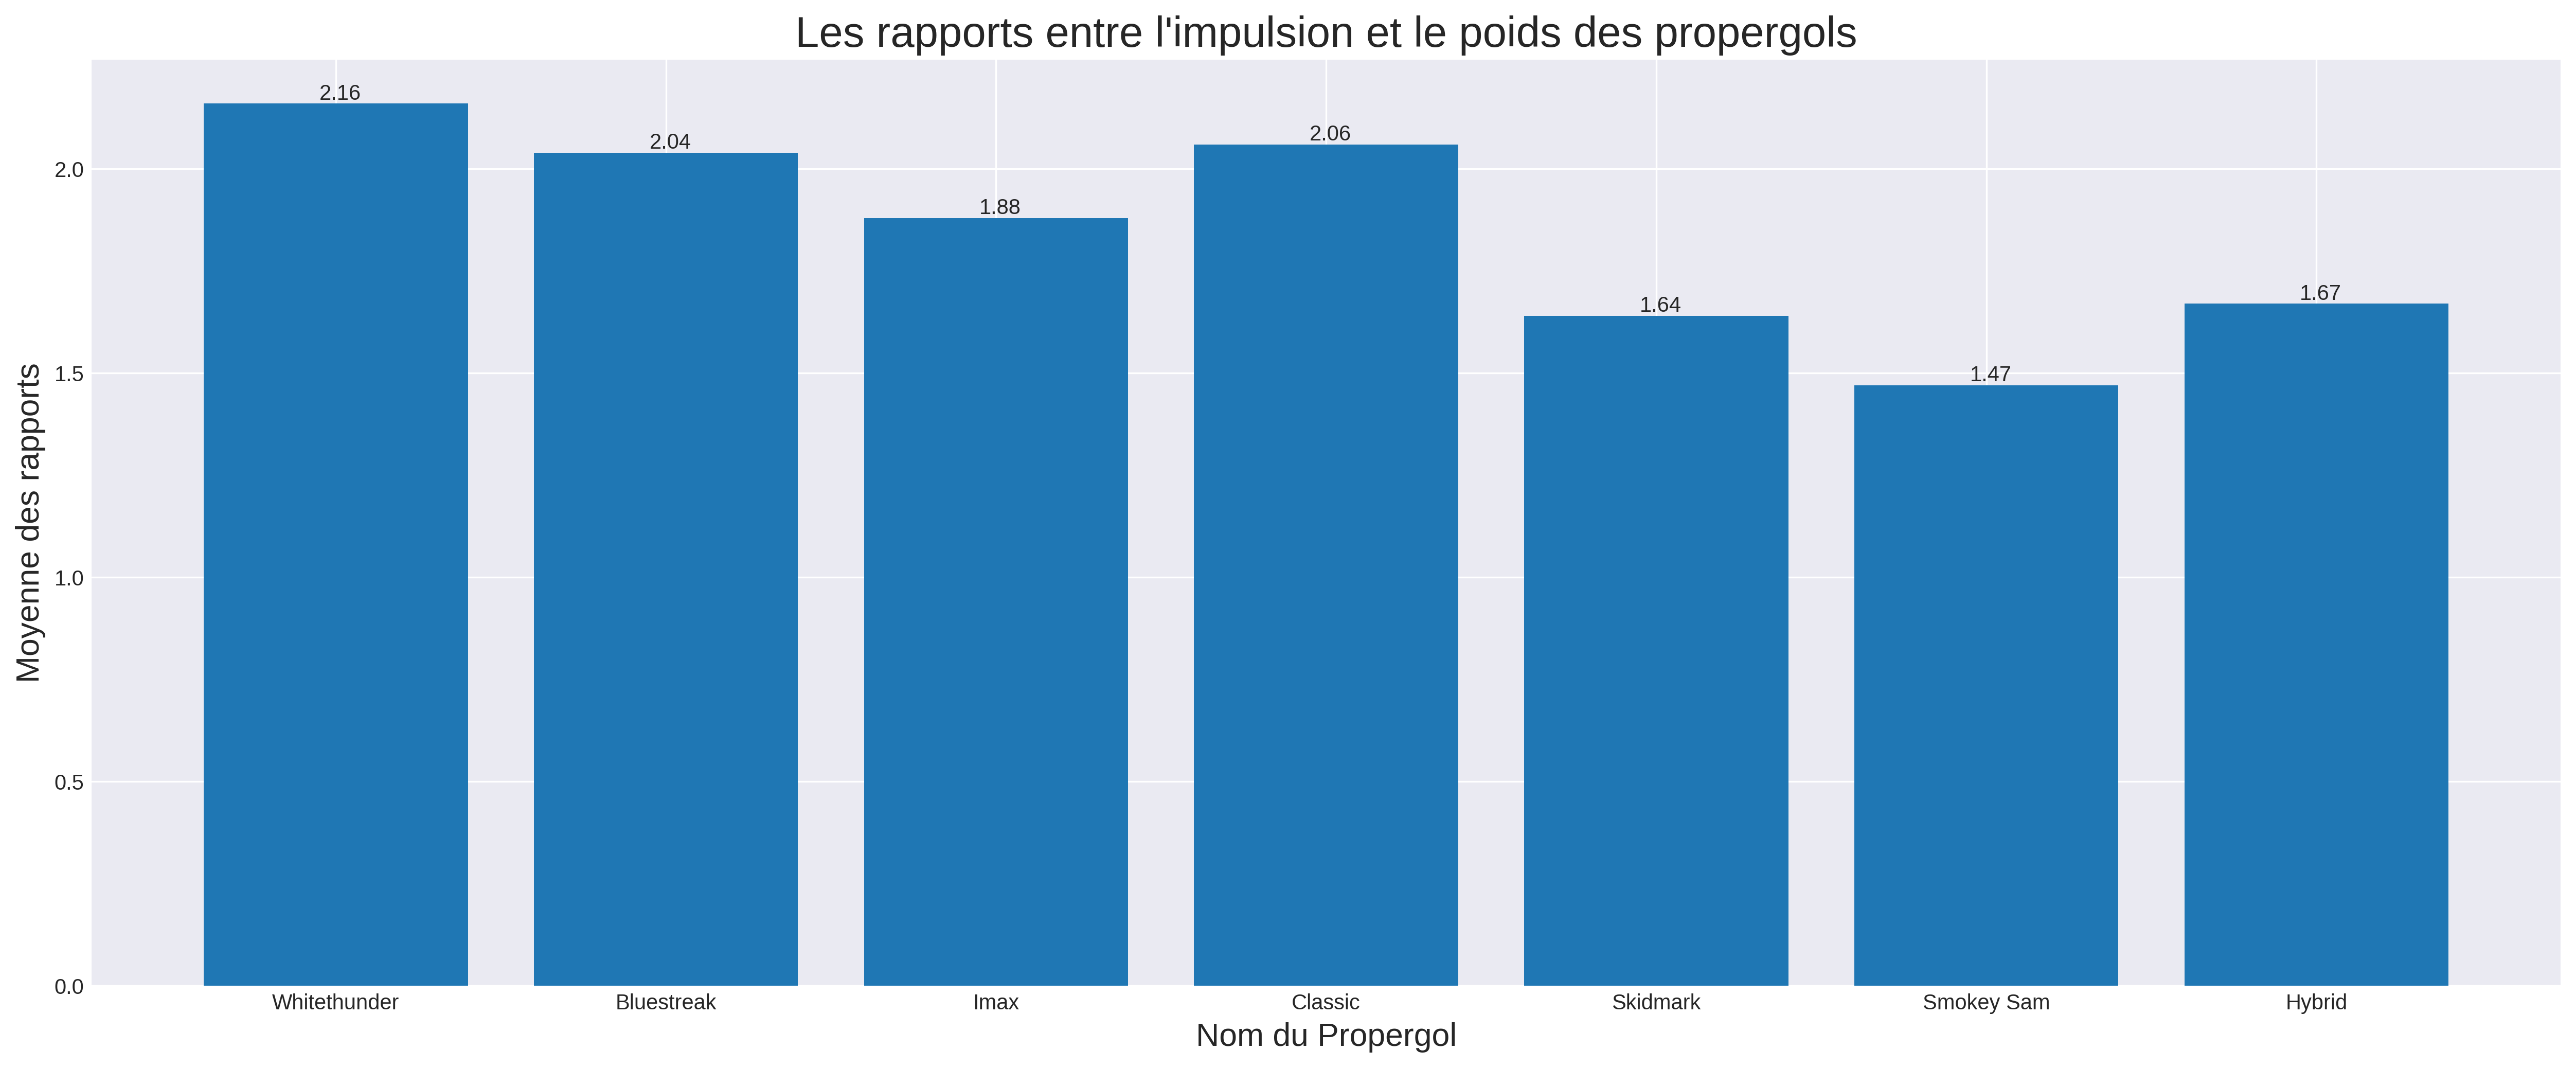

In [18]:
import matplotlib.pyplot as plt
   
x= [propergol['Name'] for propergol in propergol_rapport]
y= [propergol['Ratio'] for propergol in propergol_rapport] 

fig = plt.figure(figsize=(16, 6), dpi=300)

ax = fig.add_axes([0,0,1,1])
langs = y
students = [23,17,35,29,12]
ax.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.050, v + 0.01, str(v))

plt.xlabel('Nom du Propergol', fontsize=15 )
plt.ylabel('Moyenne des rapports', fontsize=15)
plt.title("Les rapports entre l'impulsion et le poids des propergols" , fontsize=20)
plt.show()

D'après ce nouveau graphique, nous pouvons confirner que le propergol 'Whitethunder' est le plus performant; son rapport est le plus élevé.

# Conclusion 

---

Grâce ce a cette analyse des différents types de propergol, nous avons pu relever le combustible idéal. Les moteurs les plus performants vont-être  ceux qui utilisent "Whitethunder", ou "Classique" (qui est en deuxieme position) ou encore le propergol "Bluestreak". En revanche, le moins performant est le "Smokey Sam".

---